In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


584

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ace7229bc6446b6a558b54a11efb9f9e


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | bababe
City not found. Skipping...
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | yablonovo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | caribou
Processing Record 9 of Set 1 | vestmannaeyjar
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | mogadishu
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | boromo
Processing Record 17 of Set 1 | peddapuram
Processing Record 18 of Set 1 | farah
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | zemio
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 

Processing Record 37 of Set 4 | krasnaya gora
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | vanavara
Processing Record 40 of Set 4 | prikubanskiy
Processing Record 41 of Set 4 | valley city
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | klaeng
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | san borja
Processing Record 47 of Set 4 | fasa
Processing Record 48 of Set 4 | mbanza-ngungu
Processing Record 49 of Set 4 | waddan
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | barcelos
Processing Record 2 of Set 5 | durgapur
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | kerteh
City not found. Skipping...
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | ganzhou
Processing Record 8 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 5 | kaita

Processing Record 27 of Set 8 | dubbo
Processing Record 28 of Set 8 | acarau
Processing Record 29 of Set 8 | taltal
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | bergerac
Processing Record 32 of Set 8 | datong
Processing Record 33 of Set 8 | tucuman
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | chaykovskiy
Processing Record 36 of Set 8 | amderma
City not found. Skipping...
Processing Record 37 of Set 8 | matay
Processing Record 38 of Set 8 | kenitra
Processing Record 39 of Set 8 | huaicheng
Processing Record 40 of Set 8 | rudnya
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | comodoro rivadavia
Processing Record 43 of Set 8 | sydney
Processing Record 44 of Set 8 | quang ngai
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | norrtalje
Processing Record 48 of Set 8 | karamay
City not found. Skipping...
Processing Record 49 of Set 8

Processing Record 13 of Set 12 | pozo colorado
Processing Record 14 of Set 12 | yenagoa
Processing Record 15 of Set 12 | aykhal
Processing Record 16 of Set 12 | nampa
Processing Record 17 of Set 12 | jamame
Processing Record 18 of Set 12 | jacareacanga
Processing Record 19 of Set 12 | manacor
Processing Record 20 of Set 12 | kalabo
Processing Record 21 of Set 12 | tandil
Processing Record 22 of Set 12 | puerto narino
Processing Record 23 of Set 12 | beringovskiy
Processing Record 24 of Set 12 | plouzane
Processing Record 25 of Set 12 | concordia
Processing Record 26 of Set 12 | luwuk
Processing Record 27 of Set 12 | karaul
City not found. Skipping...
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | dingle
Processing Record 30 of Set 12 | kabarnet
Processing Record 31 of Set 12 | sibolga
Processing Record 32 of Set 12 | ko samui
Processing Record 33 of Set 12 | gladstone
Processing Record 34 of Set 12 | paratinga
-----------------------------
Data Retrieval

In [202]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camacupa,-12.0167,17.4833,65.80,84,100,1.81,AO,2021-10-19 22:47:42
1,Hermanus,-34.4187,19.2345,61.90,89,3,12.30,ZA,2021-10-19 22:47:43
2,Rikitea,-23.1203,-134.9692,75.00,76,0,20.78,PF,2021-10-19 22:47:05
3,Chico,39.7285,-121.8375,67.57,41,75,1.01,US,2021-10-19 22:43:39
4,Moroto,2.5345,34.6666,70.18,65,69,3.49,UG,2021-10-19 22:47:43
5,Palasa,18.7667,84.4167,78.22,89,95,3.06,IN,2021-10-19 22:47:44
6,Bulgan,48.8125,103.5347,30.87,58,0,2.75,MN,2021-10-19 22:47:44
7,Torbay,47.6666,-52.7314,50.77,87,75,4.61,CA,2021-10-19 22:47:44
8,Maniitsoq,65.4167,-52.9000,35.55,46,24,8.99,GL,2021-10-19 22:47:45
9,Provideniya,64.3833,-173.3000,33.91,69,75,11.18,RU,2021-10-19 22:47:45


In [203]:
#we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
new_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_order]

In [204]:
#Otra forma de ordenar columnas
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]

In [205]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [206]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

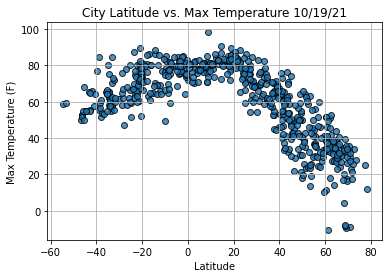

In [207]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

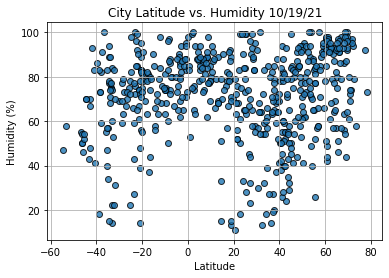

In [208]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " +time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

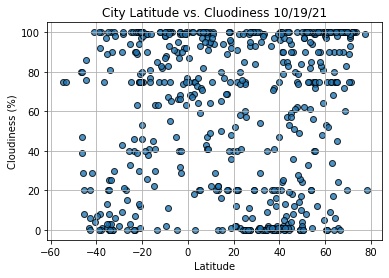

In [209]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cluodiness " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

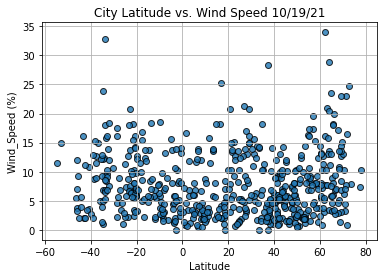

In [210]:
# Build the scatter plots for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Wind_Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [225]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [226]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Chico,US,2021-10-19 22:43:39,39.7285,-121.8375,67.57,41,75,1.01
4,Moroto,UG,2021-10-19 22:47:43,2.5345,34.6666,70.18,65,69,3.49
5,Palasa,IN,2021-10-19 22:47:44,18.7667,84.4167,78.22,89,95,3.06
6,Bulgan,MN,2021-10-19 22:47:44,48.8125,103.5347,30.87,58,0,2.75
7,Torbay,CA,2021-10-19 22:47:44,47.6666,-52.7314,50.77,87,75,4.61
...,...,...,...,...,...,...,...,...,...
557,Anjiang,CN,2021-10-19 22:51:13,27.3194,110.1031,54.57,96,100,3.71
561,Mawlaik,MM,2021-10-19 22:51:14,23.6333,94.4167,72.75,99,76,1.05
562,Tarko-Sale,RU,2021-10-19 22:51:15,64.9225,77.7850,43.83,82,100,23.58
563,Grand-Lahou,CI,2021-10-19 22:51:15,5.1367,-5.0242,77.36,89,59,8.12


In [227]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

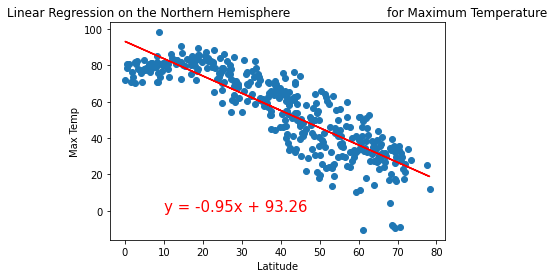

-0.8601519844546514


In [228]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

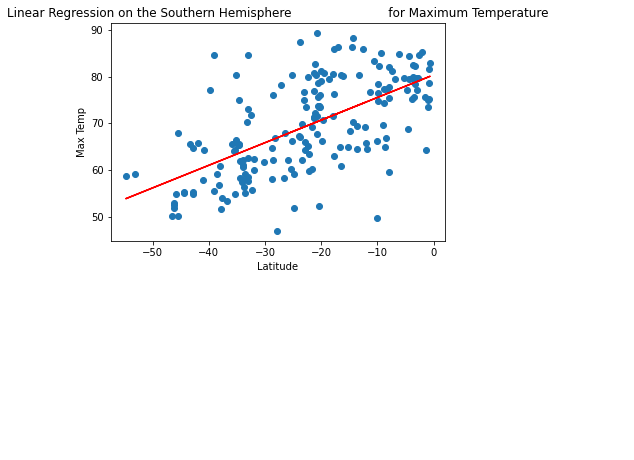

0.6299898993468207


In [229]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

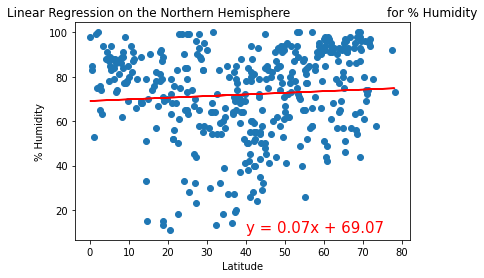

0.07238093307859199


In [231]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


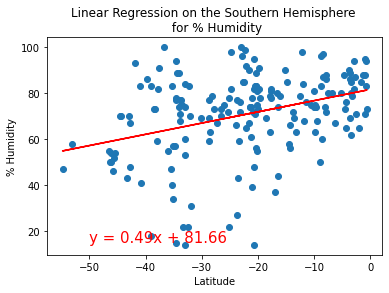

0.3563063190726691


In [233]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

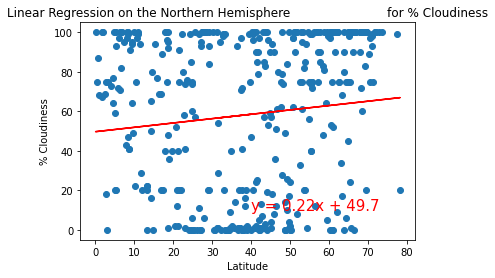

0.11267548078594941


In [234]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

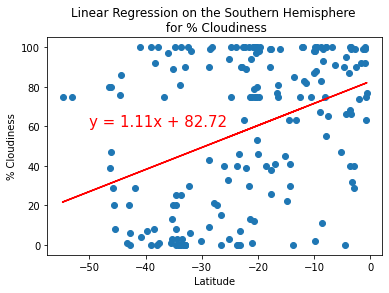

0.38661092048687457


In [236]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

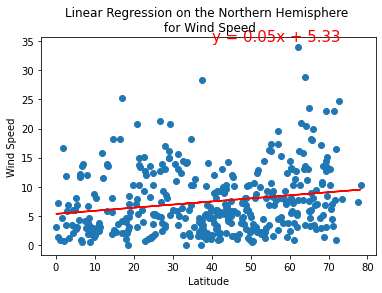

0.191329046205113


In [238]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

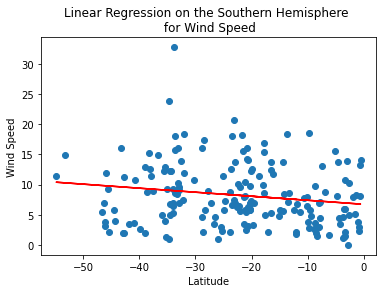

-0.17137344287439985


In [240]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [16]:
city_weather

{'coord': {'lon': -43.1842, 'lat': -12.6906},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 80.49,
  'feels_like': 81.25,
  'temp_min': 80.49,
  'temp_max': 80.49,
  'pressure': 1012,
  'humidity': 50,
  'sea_level': 1012,
  'grnd_level': 964},
 'visibility': 10000,
 'wind': {'speed': 6.78, 'deg': 85, 'gust': 18.12},
 'clouds': {'all': 83},
 'dt': 1635552410,
 'sys': {'country': 'BR', 'sunrise': 1635495623, 'sunset': 1635540738},
 'timezone': -10800,
 'id': 3455029,
 'name': 'Paratinga',
 'cod': 200}